In [1]:
cd

/home/luxx0489


In [3]:
# import packages
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
import pycircstat

from scipy.stats import circmean,circvar
from mne.preprocessing import ICA
from scipy.io import loadmat, savemat
from mne.viz import plot_evoked_topo, plot_evoked

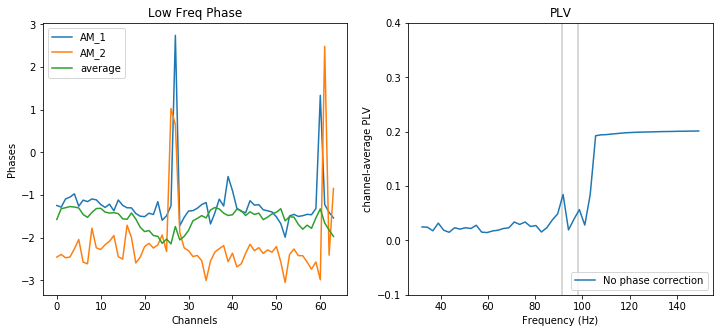

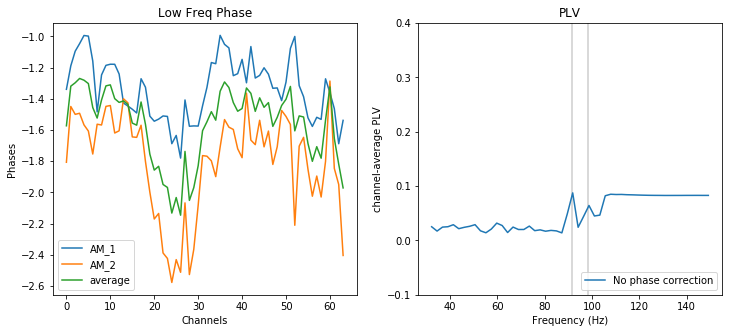

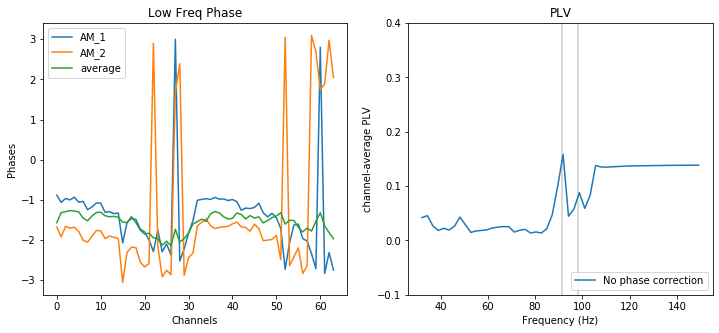

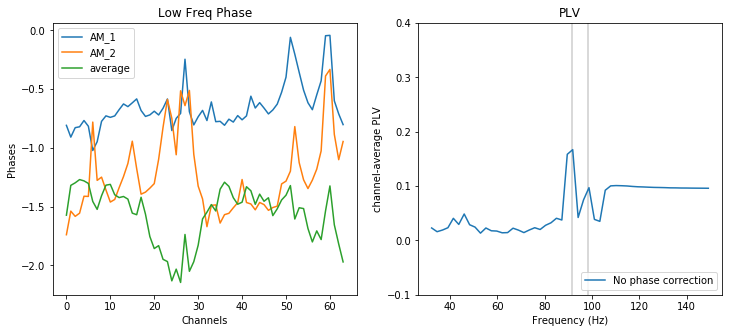

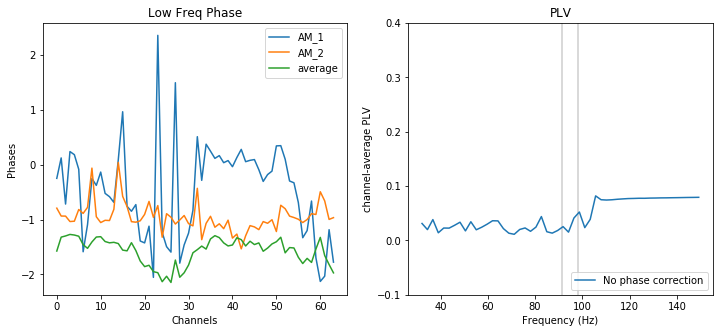

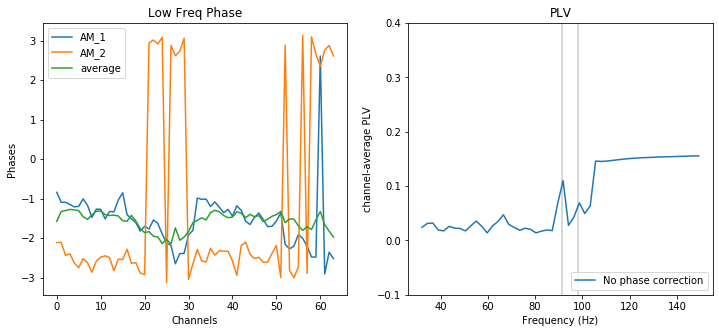

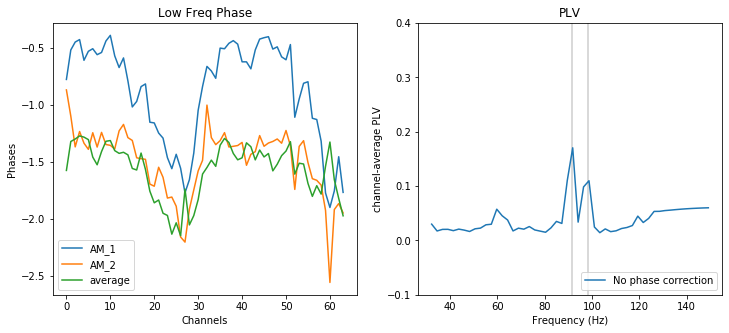

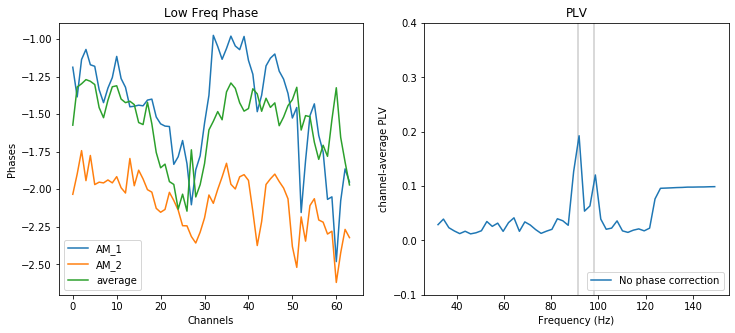

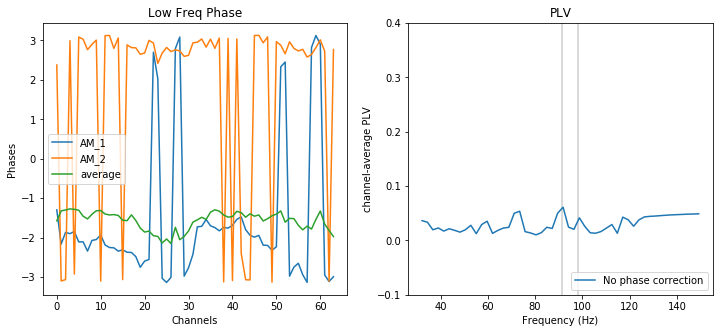

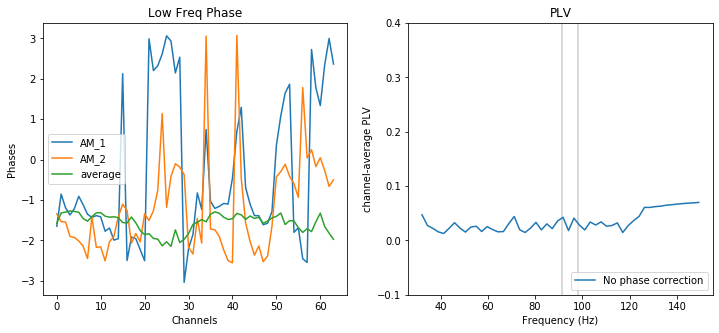

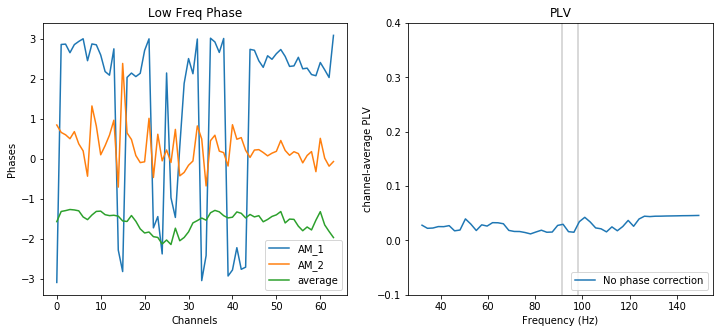

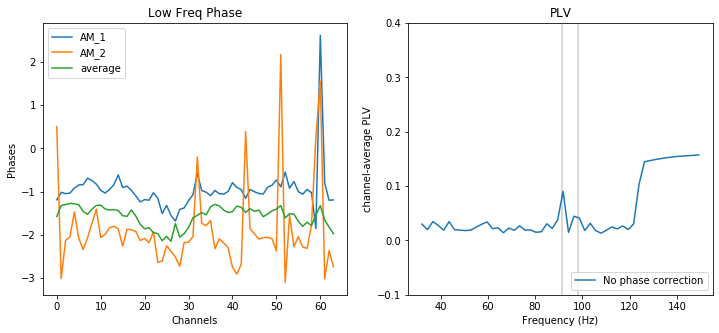

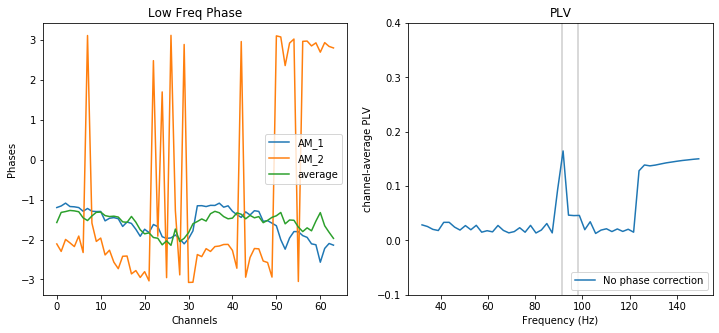

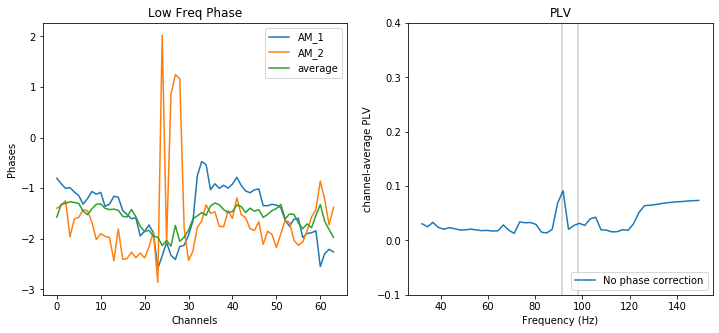

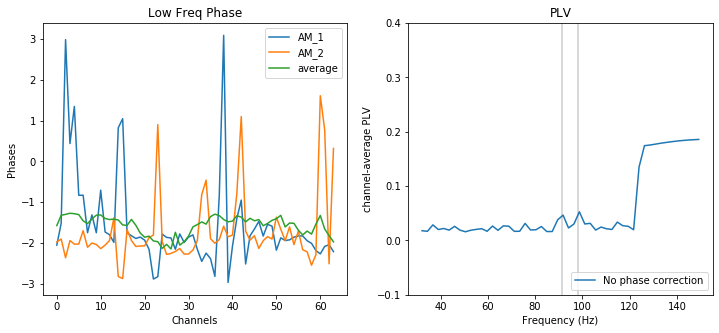

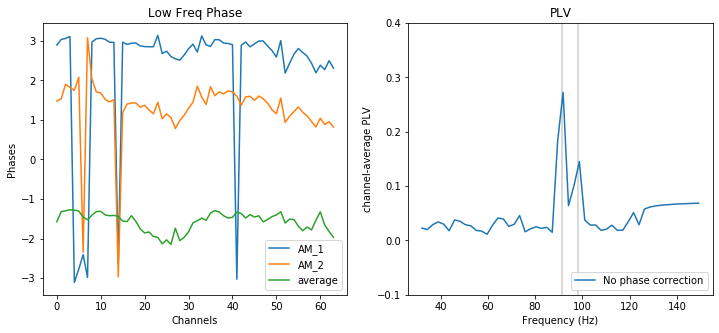

In [13]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat_1 = np.empty((16,64))
for iSubject in  range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT

    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)

    # plot phases

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-91.42))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_1')
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_2')
    plt.plot(phase,label='average')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)
    plt.axvline(91.42,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='No phase correction')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(-0.1,0.4)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat_1[iSubject-2,:] = np.angle(xw.mean(0)[:,index])


In [15]:
phase_mat_1.shape

(16, 64)

In [9]:
data_path = './jupyter_projects/StreamingEEG_exp5/'

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

In [58]:
phase_m = [circmean(phase_mat_1[:,i],high=2*np.pi,low=0) for i in range(64)]
phase_v = [circvar(phase_mat_1[:,i],high=np.pi,low=-np.pi) for i in range(64)]

In [96]:
phase_mat_1s = np.empty(phase_mat_1.shape)
for k in range(16):
    phase_mat_1s[k,:] = (phase_mat_1[k,:] - circmean(phase_mat_1[k,:],low=-np.pi,high = np.pi)+np.pi)%(2*np.pi)

In [99]:
phase_1sm = [circmean(phase_mat_1s[:,i],high=2*np.pi,low=0) for i in range(64)]
phase_1sv = [circvar(phase_mat_1[:,i],high=2*np.pi,low=0) for i in range(64)]

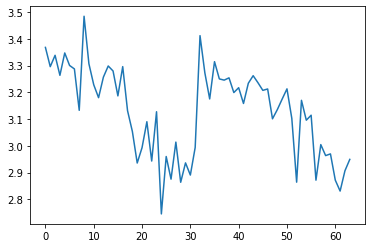

In [102]:
plt.plot(phase_1sm)
#plt.errorbar(list(range(64)),phase_1sm,phase_1sv/np.sqrt(16))

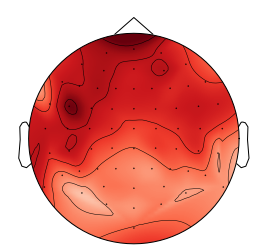

(<matplotlib.image.AxesImage at 0x7f48f35dabd0>,
 <matplotlib.contour.QuadContourSet at 0x7f48f35f5990>)

In [104]:
mne.viz.plot_topomap(phase_1sm,pos,vmin=2.5,vmax=3.5)

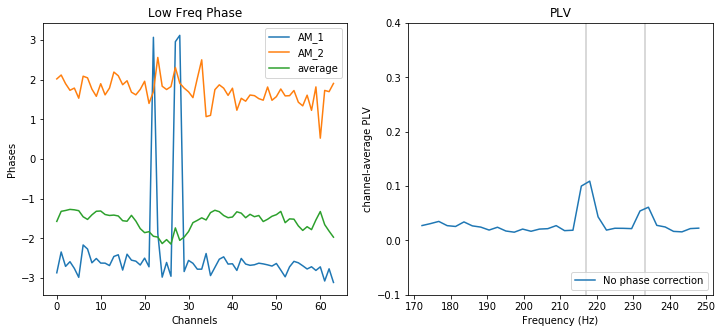

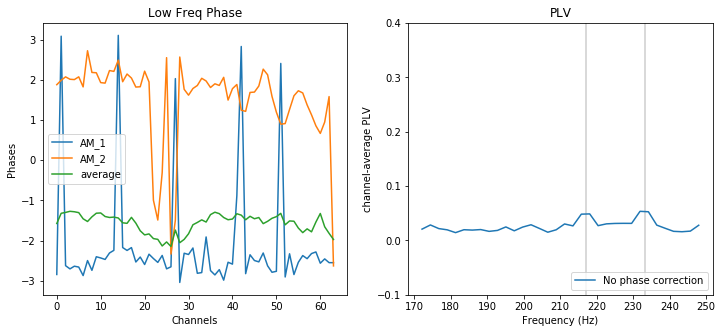

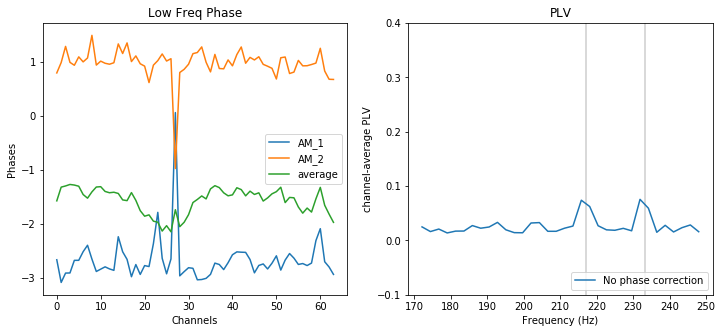

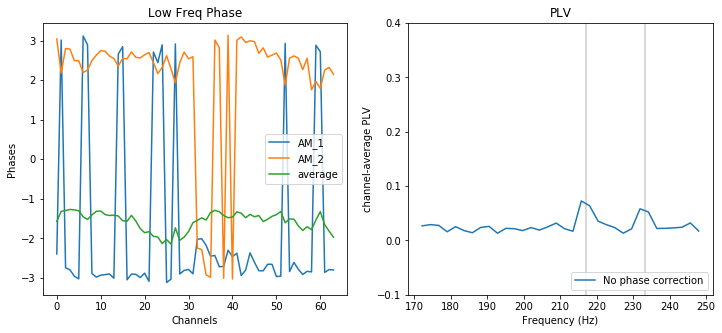

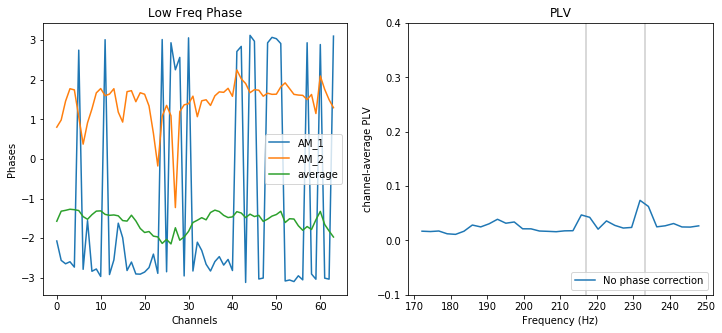

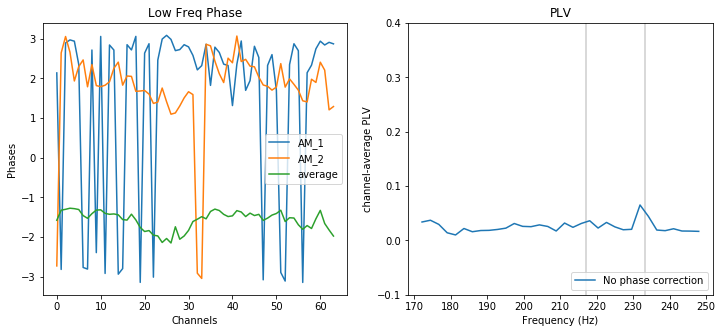

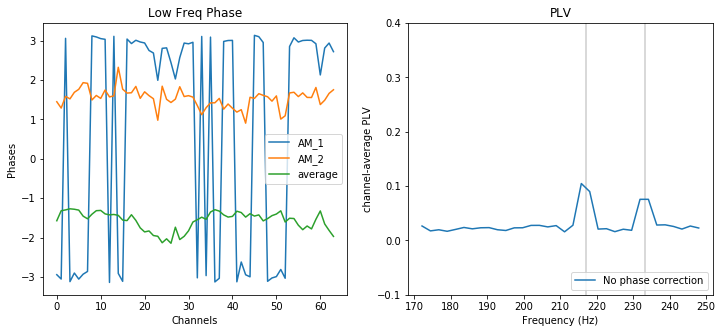

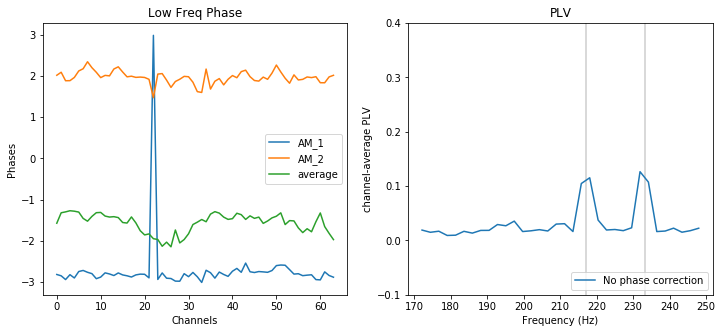

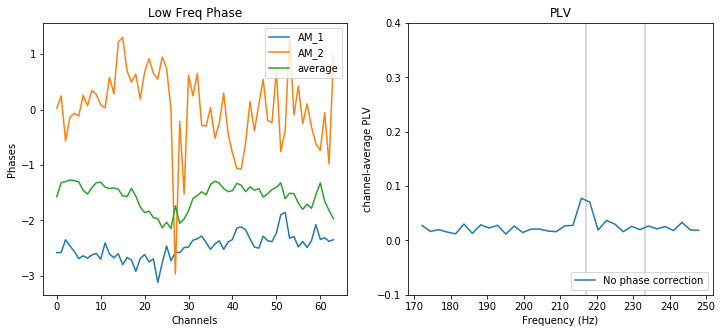

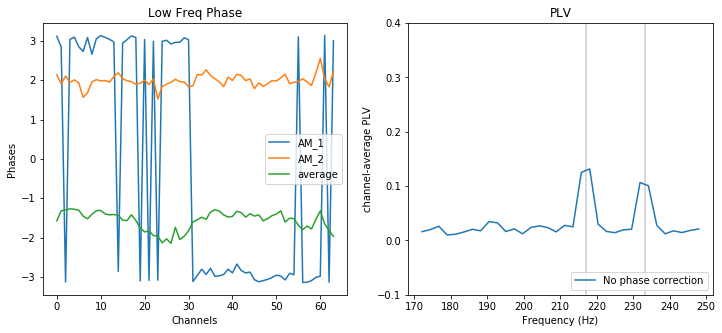

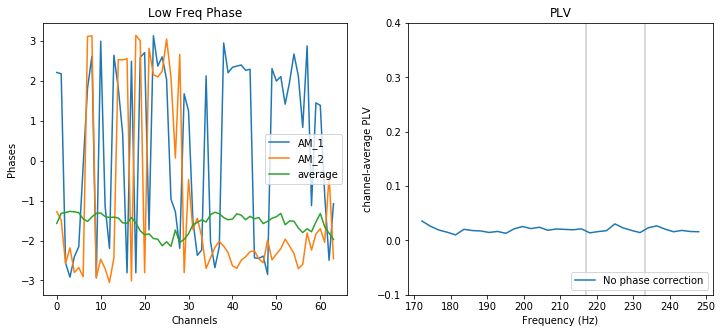

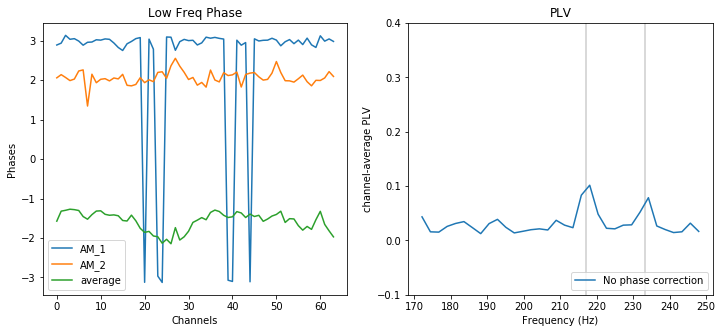

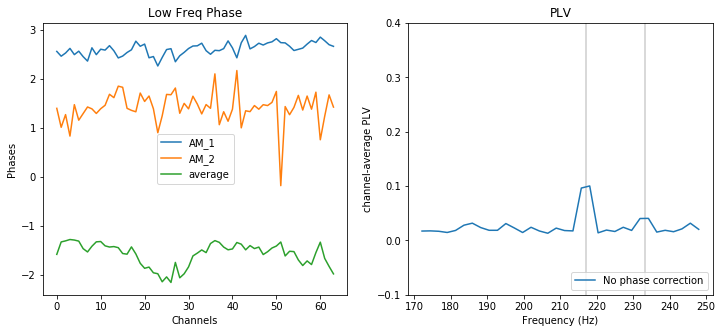

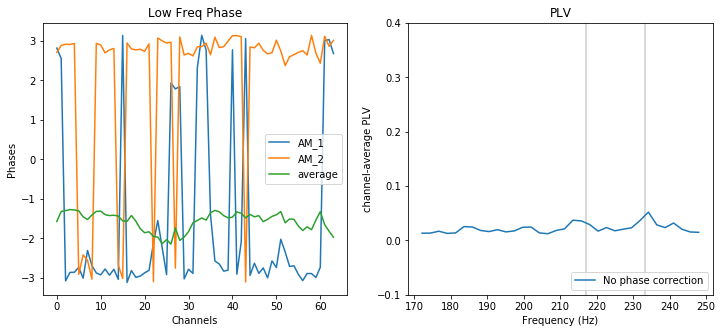

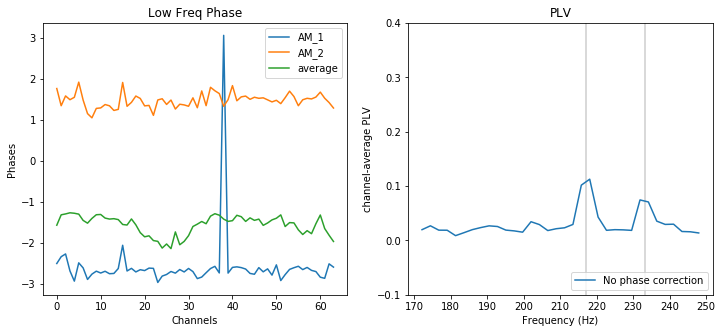

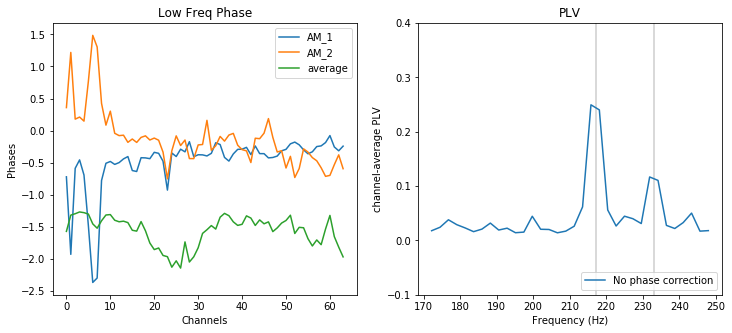

In [17]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat_2 = np.empty((16,64))
for iSubject in range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_HF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT

    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)

    # plot phases

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)


    
    index = np.argmin(abs(freq-217.13))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_1')
    index = np.argmin(abs(freq-233.13))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_2')
    plt.plot(phase,label='average')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>170,freq<250)
    plt.axvline(217.13,color='k',alpha=0.2)
    plt.axvline(233.13,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='No phase correction')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(-0.1,0.4)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-233.13))
    phase_mat_2[iSubject-2,:] = np.angle(xw.mean(0)[:,index])


In [64]:
phase_m = [circmean(phase_mat_2[:,i],high=np.pi,low=-np.pi) for i in range(64)]
phase_v = [circvar(phase_mat_2[:,i],high=np.pi,low=-np.pi) for i in range(64)]

<ErrorbarContainer object of 3 artists>

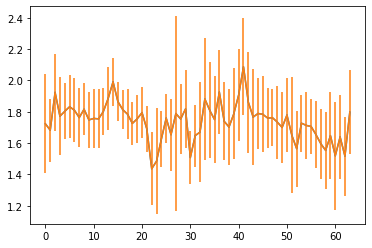

In [68]:
plt.plot(phase_m)
plt.errorbar(list(range(64)),phase_m,phase_v/np.sqrt(16))

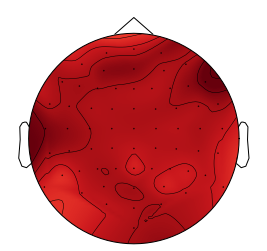

(<matplotlib.image.AxesImage at 0x7f48f43b9790>,
 <matplotlib.contour.QuadContourSet at 0x7f48f431e150>)

In [67]:
mne.viz.plot_topomap(phase_m,pos)

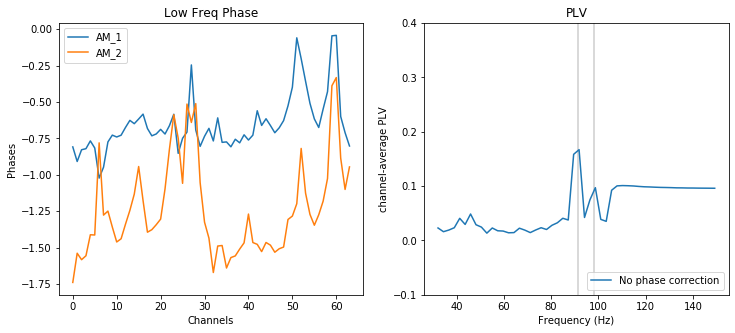

In [3]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat_1 = np.empty((16,64))
for iSubject in [5]:# range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT

    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)

    # plot phases

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-91.42))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_1')
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_2')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)
    plt.axvline(91.42,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='No phase correction')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(-0.1,0.4)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat_1[iSubject-2,:] = np.angle(xw.mean(0)[:,index])


In [4]:
x.shape

(1500, 64, 446)

IndexError: too many indices for array

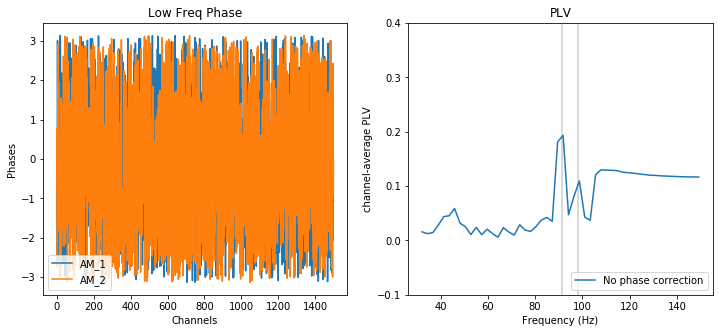

In [7]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat_1 = np.empty((16,64))
for iSubject in [5]:# range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT

    x=data.transpose(2,0,1).mean(1)
    xw = np.fft.rfft(np.hamming(x.shape[1])*x, axis=1)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[1],1/1024)

    # plot phases

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-91.42))
    plt.plot(np.angle(xw[:,index]),label='AM_1')
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw[:,index]),label='AM_2')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)
    plt.axvline(91.42,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1[passband],label='No phase correction')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(-0.1,0.4)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat_1[iSubject-2,:] = np.angle(xw.mean(0)[:,index])


In [8]:
(data-data.mean(0)).shape

(64, 446, 1500)

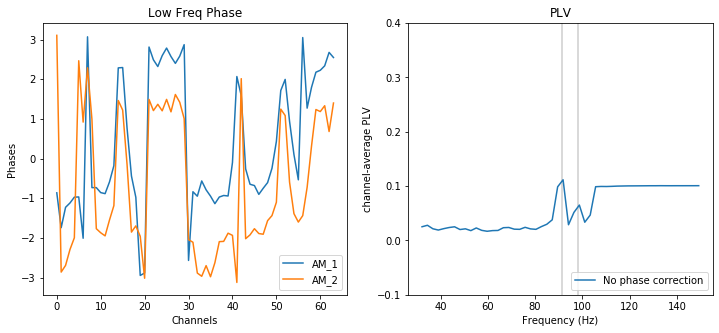

In [11]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat_1 = np.empty((16,64))
for iSubject in [5]:# range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]
    data = (data-data.mean(0))
    # FFT

    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)

    # plot phases

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-91.42))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_1')
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='AM_2')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)
    plt.axvline(91.42,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='No phase correction')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(-0.1,0.4)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat_1[iSubject-2,:] = np.angle(xw.mean(0)[:,index])


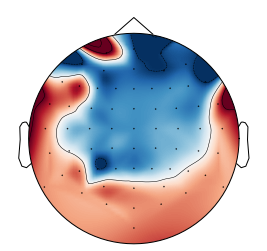

(<matplotlib.image.AxesImage at 0x7ff09f1ef710>,
 <matplotlib.contour.QuadContourSet at 0x7ff09ebcb090>)

In [12]:
mne.viz.plot_topomap(phase_mat_1[iSubject-2,:],pos)

In [4]:
phase_mat_1

NameError: name 'phase_mat_1' is not defined